In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import nltk
import re
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer

from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.model_selection import GridSearchCV

import pickle

import streamlit as st

In [9]:
df = pd.read_csv('/Users/amitha/Downloads/TASK4/spam.csv', encoding='latin-1')
df = df[['v1', 'v2']]  # Keep only relevant columns
df.columns = ['label', 'message']

  label                                            message
0   ham  Go until jurong point, crazy.. Available only ...
1   ham                      Ok lar... Joking wif u oni...
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...
3   ham  U dun say so early hor... U c already then say...
4   ham  Nah I don't think he goes to usf, he lives aro...
label
ham     4825
spam     754
Name: count, dtype: int64


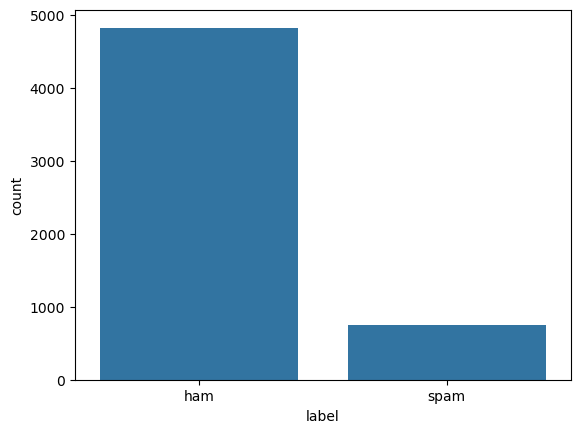

In [11]:
print(df.head())
print(df['label'].value_counts())
sns.countplot(x='label', data=df)
plt.show()


In [13]:
nltk.download('stopwords')
ps = PorterStemmer()

stop_words = set(stopwords.words('english'))  # Download once outside the loop

corpus = []
for msg in df['message']:
    review = re.sub('[^a-zA-Z]', ' ', msg)
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if word not in stop_words]
    corpus.append(' '.join(review))

df['cleaned_message'] = corpus


[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/amitha/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [14]:
#Text Vectorization
tfidf = TfidfVectorizer(max_features=3000)
X = tfidf.fit_transform(df['cleaned_message']).toarray()
y = pd.get_dummies(df['label'])['spam']

In [15]:
#Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [16]:
#Model Building - naive bayes
model = MultinomialNB()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

In [17]:
#Model Evaluation
print(confusion_matrix(y_test, y_pred))
print(classification_report(y_test, y_pred))
print('Accuracy:', accuracy_score(y_test, y_pred))

[[958   1]
 [ 24 133]]
              precision    recall  f1-score   support

       False       0.98      1.00      0.99       959
        True       0.99      0.85      0.91       157

    accuracy                           0.98      1116
   macro avg       0.98      0.92      0.95      1116
weighted avg       0.98      0.98      0.98      1116

Accuracy: 0.9775985663082437


In [23]:
#Hyperparameter Tuning
parameters = {'alpha': [0.1, 0.5, 1.0]}
grid_search = GridSearchCV(MultinomialNB(), parameters)
grid_search.fit(X_train, y_train)

print(grid_search.best_params_)


{'alpha': 0.1}


In [24]:
#Save the model and TF-IDF vectorizer
pickle.dump(model, open('spam_detector.pkl', 'wb'))
pickle.dump(tfidf, open('vectorizer.pkl', 'wb'))
